In [8]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib

In [11]:
import pandas as pd 
import numpy
import matplotlib.pyplot as plt 

%matplotlib inline


In [15]:
df = pd.read_csv('./data/JC-201811-citibike-tripdata.csv', low_memory= False)

In [16]:
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1188,2018-11-01 06:32:27.5190,2018-11-01 06:52:15.9140,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,33662,Customer,1969,0
1,278,2018-11-01 07:14:31.8680,2018-11-01 07:19:10.2610,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29254,Subscriber,1963,1
2,115,2018-11-01 07:33:17.1920,2018-11-01 07:35:12.2830,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,33607,Subscriber,1966,1
3,155,2018-11-01 08:20:10.9320,2018-11-01 08:22:46.7050,3183,Exchange Place,40.716247,-74.033459,3681,Grand St,40.715178,-74.037683,29222,Subscriber,1975,2
4,82,2018-11-01 08:35:02.7850,2018-11-01 08:36:25.1840,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29678,Subscriber,1975,1


In [17]:
import time

now = time.time()
df = pd.read_csv('./data/JC-201811-citibike-tripdata.csv', low_memory=False)
time.time() - now

0.0704493522644043

In [18]:
df['end station name'] \
  .value_counts() \
  .sort_values(ascending=False) \
  .head(5)


Grove St PATH     3808
Exchange Place    1546
Sip Ave           1336
Hamilton Park     1272
Newport PATH      1037
Name: end station name, dtype: int64

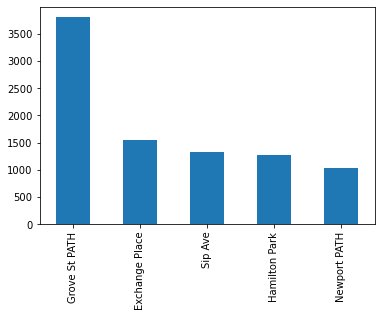

In [21]:
df['end station name'] \
  .value_counts() \
  .sort_values(ascending=False) \
  .head(5) \
  .plot \
  .bar()

Spark

In [22]:
from pyspark.sql import SparkSession
# create sparksession
spark = SparkSession \
    .builder \
    .appName("CitibikeAnalysis") \
    .getOrCreate()

In [23]:
df = spark.read.csv('./data/JC-201811-citibike-tripdata.csv', header='true', inferSchema = True)

In [24]:
df.columns

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender']

In [25]:
df.show(5)

+------------+--------------------+--------------------+----------------+------------------+----------------------+-----------------------+--------------+----------------+--------------------+---------------------+------+----------+----------+------+
|tripduration|           starttime|            stoptime|start station id|start station name|start station latitude|start station longitude|end station id|end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|
+------------+--------------------+--------------------+----------------+------------------+----------------------+-----------------------+--------------+----------------+--------------------+---------------------+------+----------+----------+------+
|        1188|2018-11-01 06:32:...|2018-11-01 06:52:...|            3183|    Exchange Place|            40.7162469|            -74.0334588|          3199|    Newport Pkwy|          40.7287448|          -74.0321082| 33662|  Customer|      1969|    

In [26]:
df.head(3)

[Row(tripduration=1188, starttime=datetime.datetime(2018, 11, 1, 6, 32, 27, 519000), stoptime=datetime.datetime(2018, 11, 1, 6, 52, 15, 914000), start station id=3183, start station name='Exchange Place', start station latitude=40.7162469, start station longitude=-74.0334588, end station id=3199, end station name='Newport Pkwy', end station latitude=40.7287448, end station longitude=-74.0321082, bikeid=33662, usertype='Customer', birth year=1969, gender=0),
 Row(tripduration=278, starttime=datetime.datetime(2018, 11, 1, 7, 14, 31, 868000), stoptime=datetime.datetime(2018, 11, 1, 7, 19, 10, 261000), start station id=3183, start station name='Exchange Place', start station latitude=40.7162469, start station longitude=-74.0334588, end station id=3202, end station name='Newport PATH', end station latitude=40.7272235, end station longitude=-74.0337589, bikeid=29254, usertype='Subscriber', birth year=1963, gender=1),
 Row(tripduration=115, starttime=datetime.datetime(2018, 11, 1, 7, 33, 17, 

In [27]:
df.select('end station name').show(10)

+----------------+
|end station name|
+----------------+
|    Newport Pkwy|
|    Newport PATH|
|     Paulus Hook|
|        Grand St|
|     Paulus Hook|
|   Washington St|
|        Grand St|
|Essex Light Rail|
|   Grove St PATH|
|  Van Vorst Park|
+----------------+
only showing top 10 rows



In [28]:
df.groupBy('end station name').count().orderBy('count', ascending=False).show(5)

+----------------+-----+
|end station name|count|
+----------------+-----+
|   Grove St PATH| 3808|
|  Exchange Place| 1546|
|         Sip Ave| 1336|
|   Hamilton Park| 1272|
|    Newport PATH| 1037|
+----------------+-----+
only showing top 5 rows



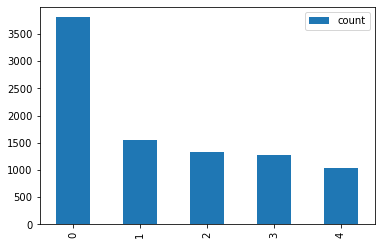

In [29]:
#convert to pandas:
pdf = df.groupBy('end station name').count().orderBy('count', ascending=False).toPandas()
pdf.head(5).plot.bar()

Spark SQL Analysis

In [30]:
df.createOrReplaceTempView('Citibike')
spark.sql(
'''
SELECT `end station name` FROM Citibike
LIMIT 10
'''
).show()

+----------------+
|end station name|
+----------------+
|    Newport Pkwy|
|    Newport PATH|
|     Paulus Hook|
|        Grand St|
|     Paulus Hook|
|   Washington St|
|        Grand St|
|Essex Light Rail|
|   Grove St PATH|
|  Van Vorst Park|
+----------------+



In [31]:
spark.sql(
'''
SELECT `end station name`, COUNT ( `end station name`) as most_popular_stations FROM Citibike
GROUP BY `end station name`
ORDER BY most_popular_stations DESC
LIMIT 5
'''
).show()


+----------------+---------------------+
|end station name|most_popular_stations|
+----------------+---------------------+
|   Grove St PATH|                 3808|
|  Exchange Place|                 1546|
|         Sip Ave|                 1336|
|   Hamilton Park|                 1272|
|    Newport PATH|                 1037|
+----------------+---------------------+



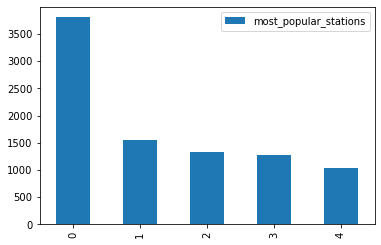

In [32]:
sqldf = spark.sql(
'''
SELECT `end station name`, COUNT ( `end station name`) as most_popular_stations FROM Citibike
GROUP BY `end station name`
ORDER BY most_popular_stations DESC
LIMIT 5
'''
)

sqldf.toPandas().plot.bar()